In [1]:
from sklearn.linear_model import LinearRegression, ElasticNet, HuberRegressor, RANSACRegressor
from sklearn.neighbors import KDTree

import matplotlib.pyplot as plt
import numpy as np

import collections
import warnings

%matplotlib inline


warnings.filterwarnings(action='ignore')

Load train and test datasets.

In [17]:
X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

X_test = np.load('x_test.npy')

How average price depends on location of house?

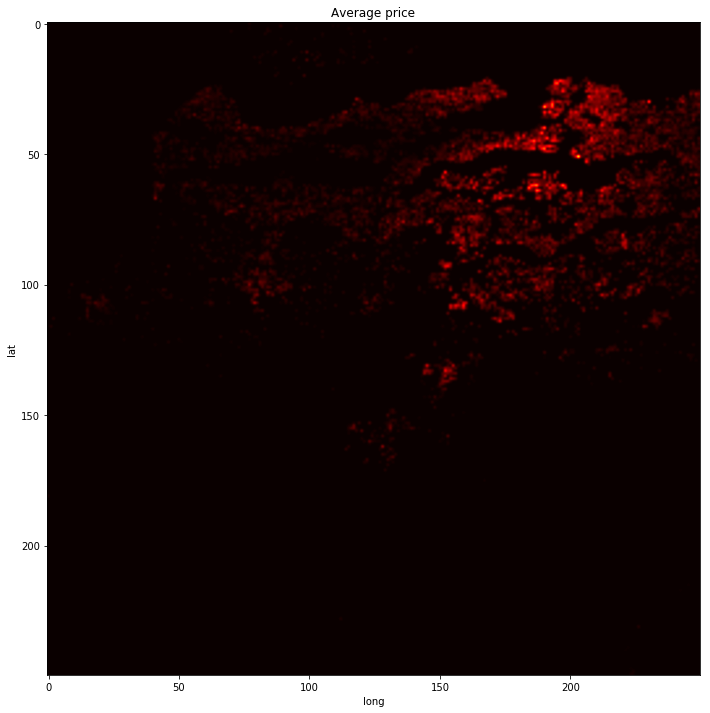

In [18]:
hist, *_ = np.histogram2d(
    X_train['long'],
    X_train['lat'],
    bins = 250,
    normed = True,
    weights = y_train,
)

plt.figure(figsize=(12, 12))
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Average price')

plt.imshow(hist, cmap='hot', interpolation='gaussian');

How average price depends on grade?

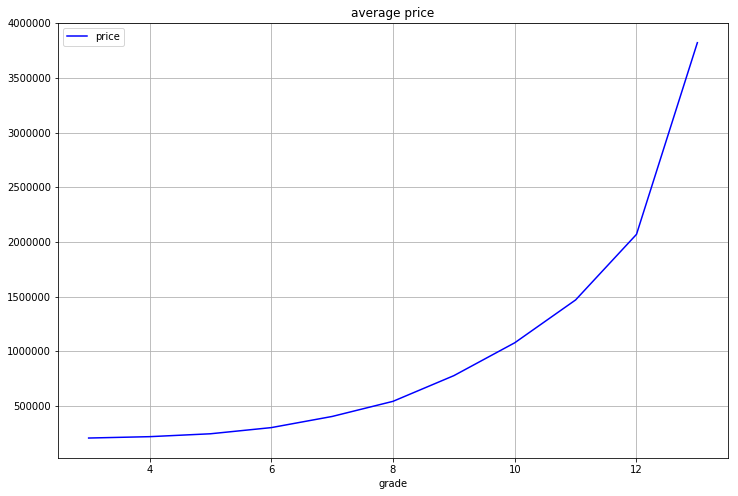

In [19]:
grades = list(range(3, 14))
prices = [y_train[X_train['grade'] == grade].mean() for grade in grades]

plt.figure(figsize=(12, 8))
plt.title('average price')
plt.xlabel('grade')
plt.plot(grades, prices, color='blue', label='price')
plt.grid()
plt.legend()

In [20]:
kdtree = KDTree(np.vstack([X_train['lat'], X_train['long']]).T)

In [21]:
avg_price_by_grade = [y_train[X_train['grade'] == g].mean() for g in grades]


y_predict = []

for i in range(X_test.size):
    k = 120
    
    x = X_test[i]
    point = np.array([[x['lat'], x['long']]])
    _, ids = kdtree.query(point, k=k)
    ids = list(ids.flatten())
  
    regression = LinearRegression()
    regression = ElasticNet(alpha=1e-3)

    X_subtrain = X_train[ids]
    y_subtrain = y_train[ids]
    
    def transform(X):
        grade = np.array([avg_price_by_grade[g - 3] for g in X['grade']])
        
        return np.vstack([
            X['sqft_basement'],
            X['sqft_above'],
            grade,
            grade * X['sqft_lot'],
            X['waterfront'],
            X['condition'] * X['sqft_living'],
            (X['yr_built'] >= 2012)
        ]).T    
    
    regression.fit(transform(X_subtrain), y_subtrain)
    y = regression.predict(transform(X_test[i:i+1]))
    
    y_predict.append(y[0])

with open('y_solution.csv', 'w') as out:
    print('Id,Price', file=out)
    for pair in enumerate(y_predict, 1):
        print('%i,%f' % pair, file=out)

In [28]:
avg_price_by_grade = [y_train[X_train['grade'] == g].mean() for g in grades]


y_predict = []

for i in range(X_test.size):
    k = 120
    
    x = X_test[i]
    point = np.array([[x['lat'], x['long']]])
    _, ids = kdtree.query(point, k=k)
    ids = list(ids.flatten())
  
    regression = LinearRegression()
#     regression = ElasticNet(alpha=1e-3)

    X_subtrain = X_train[ids]
    y_subtrain = y_train[ids]
    
    def transform(X):
        grade = np.array([avg_price_by_grade[g - 3] for g in X['grade']])
        
#         return np.vstack([
#             np.log(X['sqft_basement'] + 1),
#             np.log(X['sqft_above'] + 1),
#             np.log(grade + 1),
#             np.log(grade * X['sqft_lot'] + 1),
#             np.log(X['waterfront'] + 1),
#             np.log(X['condition'] * X['sqft_living'] + 1),
#             (X['yr_built'] >= 2012)
#         ]).T    

        return np.vstack([
            X['sqft_basement'],
            X['sqft_above'],
            grade,
            grade * X['sqft_lot'],
            X['waterfront'],
            X['condition'] * X['sqft_living'],
            (X['yr_built'] >= 2012)
        ]).T    


    
    regression.fit(transform(X_subtrain), y_subtrain,  sample_weight=1/y_subtrain)
    y = regression.predict(transform(X_test[i:i+1]))
    
    y_predict.append(y[0])
    
print((np.abs(y_test - y_predict)/y_test).mean())
    
with open('y_solution.csv', 'w') as out:
    print('Id,Price', file=out)
    for pair in enumerate(y_predict, 1):
        print('%i,%f' % pair, file=out)

0.129424645683
